In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate
import tabulatehelper as th

In [2]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv('../data/NBA_Players.csv')
data.describe()

,Year,Age,G,GS,MP,FG,FGA,FG_Prct,Three_P,Three_PA,Three_P_Prct,Two_P,Two_PA,Two_P_Prct,eFG_Prct,FT,FTA,FT_Prct,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
count,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9.003000e+03
mean,2006.010108,26.868155,53.490281,27.128291,21.151361,3.215628,7.148040,0.438690,0.534000,1.529435,0.235552,2.681317,5.618249,0.462392,0.473237,1.594135,2.130712,0.703569,1.030101,2.658947,3.686871,1.919549,0.684661,0.432289,1.251027,1.927680,8.557781,0.055315,0.001777,0.002555,0.002777,0.003110,0.002110,0.002666,3.742057e+06
std,8.408611,4.255849,25.004754,29.653462,10.158378,2.224859,4.707804,0.092061,0.664535,1.748895,0.177372,2.004793,3.998221,0.098789,0.094123,1.438236,1.808355,0.185351,0.866059,1.835543,2.569872,1.848659,0.467370,0.509850,0.812884,0.825047,6.052927,0.228607,0.042122,0.050482,0.052626,0.055684,0.045893,0.051565,4.756572e+06
min,1991.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03
25%,1999.000000,24.000000,33.000000,1.000000,12.700000,1.400000,3.400000,0.403000,0.000000,0.100000,0.000000,1.100000,2.500000,0.429000,0.442000,0.600000,0.800000,0.651500,0.400000,1.300000,1.800000,0.600000,0.300000,0.100000,0.600000,1.300000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.450000e+05
50%,2006.000000,26.000000,60.000000,13.000000,20.900000,2.700000,6.100000,0.442000,0.200000,0.900000,0.294000,2.200000,4.600000,0.469000,0.482000,1.200000,1.600000,0.747000,0.800000,2.300000,3.100000,1.300000,0.600000,0.300000,1.100000,1.900000,7.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.923000e+06
75%,2013.000000,30.000000,76.000000,54.000000,29.800000,4.600000,10.100000,0.482000,0.900000,2.600000,0.363000,3.800000,7.900000,0.506000,0.516000,2.200000,2.900000,0.813000,1.400000,3.500000,4.900000,2.600000,0.900000,0.500000,1.700000,2.500000,12.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.534710e+06
max,2019.000000,43.000000,82.000000,82.000000,43.700000,12.700000,27.800000,1.000000,5.100000,13.200000,1.000000,11.700000,23.400000,1.000000,1.500000,9.700000,11.700000,1.000000,5.900000,12.300000,18.300000,14.200000,3.000000,6.000000,5.700000,6.000000,36.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.745715e+07


Stats Dictionary:

Rk -- Rank
Pos -- Position
Age -- Age of Player at the start of February 1st of that season.
Tm -- Team
G -- Games
GS -- Games Started
MP -- Minutes Played Per Game
FG -- Field Goals Per Game
FGA -- Field Goal Attempts Per Game
FG% -- Field Goal Percentage
3P -- 3-Point Field Goals Per Game
3PA -- 3-Point Field Goal Attempts Per Game
3P% -- 3-Point Field Goal Percentage
2P -- 2-Point Field Goals Per Game
2PA -- 2-Point Field Goal Attempts Per Game
2P% -- 2-Point Field Goal Percentage
eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
FT -- Free Throws Per Game
FTA -- Free Throw Attempts Per Game
FT% -- Free Throw Percentage
ORB -- Offensive Rebounds Per Game
DRB -- Defensive Rebounds Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
TOV -- Turnovers Per Game
PF -- Personal Fouls Per Game
PTS -- Points Per Game


In [3]:
position = pd.get_dummies(data['Pos'], drop_first= True)
position.columns = 'Pos_' + position.columns
data2 = pd.concat([data, position], axis=1).drop(columns = ['Pos','TRB','FGA','Three_PA','Two_PA','FTA','PTS','FG'])
features_stats = data2.drop(columns = ['Year','Player','Tm','Potw','APG_Leader','MVP','PPG_Leader','RPG_Leader','Rookie','WS_Leader','Salary'])
Potw = data2['Potw']
position.head()

,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,1,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,1,0


# Model Selection

## FULL MODEL

In [4]:
formula_1 = f'Potw ~ {" + ".join(list(features_stats.columns))}'
lm1 = smf.glm(formula_1, data = data2,family=sm.families.Binomial()).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8979
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -804.36
Date:                Sun, 13 Oct 2019   Deviance:                       1608.7
Time:                        18:02:43   Pearson chi2:                 5.37e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -11.5546      1.662     -6.951      0.000     -14.813      -8.296
Age              0.0016      0.019      0.086      0.931      -0.035       0.039
G                0.0219      0.008      2.813      0.005       0.007       0.037
GS               0.0117      0.006      1.820      0.069      -0.001       0.024
MP              -0.0684      0.028     -2.405      0.016      -0.124      -0.013
FG_Prct          7.0209      9.942      0.706      0.480     -12.466      26.508
Three_P          1.0781      0.256      4.210      0.000       0.576       1.580
Three_P_Prct    -0.6691      0.666     -1.004      0.315      -1.975       0.637
Two_P            0.6287      0.074      8.493      0.000       0.484       0.774
Two_P_Prct      -4.7789      3.358     -1.423      0.155     -11.360       1.802
eFG_Prct         0.4554      7.372      0.062      0.951     -13.994      14.905
FT               0.4298      0.066      6.494      0.000       0.300       0.559
FT_Prct          0.7733      1.089      0.710      0.478      -1.362       2.908
ORB             -0.0114      0.132     -0.086      0.931      -0.270       0.248
DRB              0.3683      0.067      5.535      0.000       0.238       0.499
AST              0.2276      0.065      3.527      0.000       0.101       0.354
STL              0.4689      0.192      2.448      0.014       0.094       0.844
BLK              0.5223      0.141      3.691      0.000       0.245       0.800
TOV             -0.1118      0.171     -0.653      0.514      -0.447       0.224
PF              -0.3689      0.145     -2.537      0.011      -0.654      -0.084
Pos_PF          -0.3861      0.255     -1.513      0.130      -0.886       0.114
Pos_PG           0.4955      0.459      1.079      0.281      -0.405       1.396
Pos_SF          -0.4740      0.352     -1.345      0.179      -1.165       0.217
Pos_SG           0.0563      0.402      0.140      0.889      -0.732       0.844
================================================================================
"""

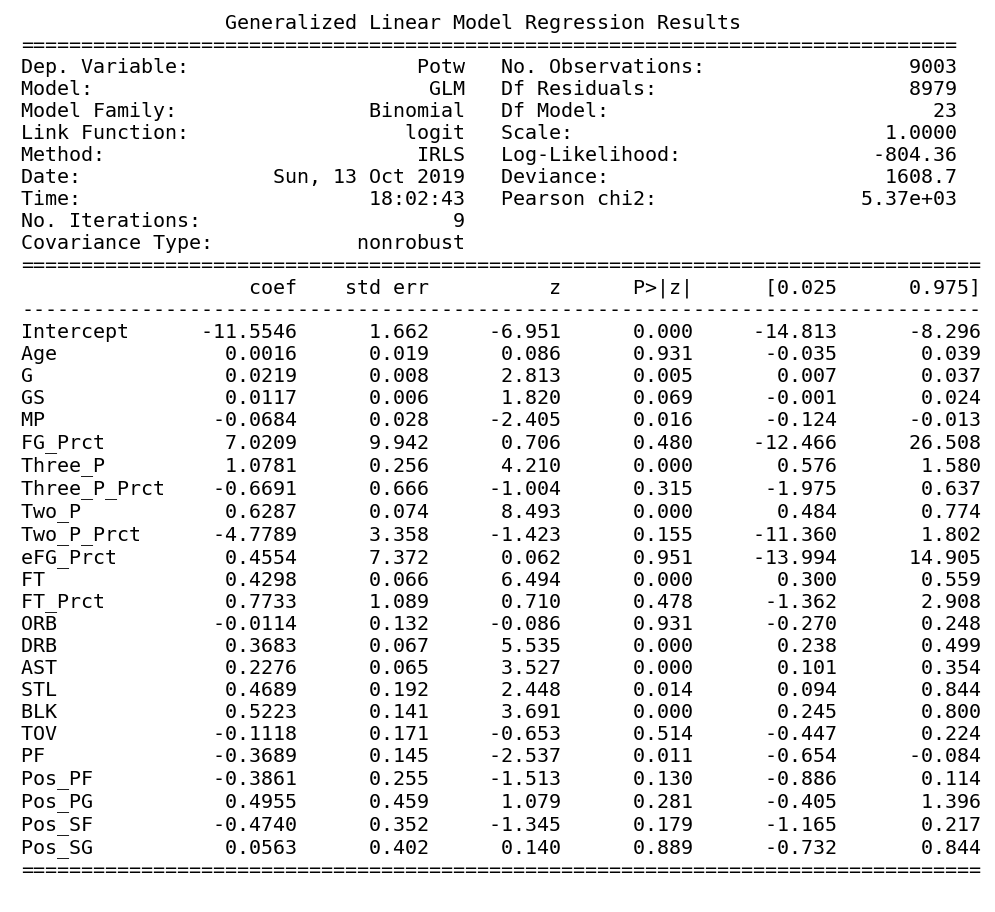

In [5]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm1.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model1.png', dpi = 300, bbox_inches = 'tight')

## Use VIF and deviance to remove correlated predictors

In [6]:
#Try to do VIF for the full model
vif = pd.DataFrame()
vif['Features'] = features_stats.columns
vif['VIF Factor'] = [variance_inflation_factor(features_stats.values, i) for i in range(features_stats.shape[1])]
print(th.md_table(vif, formats = {-1: 'c'}))

| Features     |   VIF Factor |
|:-------------|:------------:|
| Age          |     23.7475  |
| G            |     11.2644  |
| GS           |      6.57655 |
| MP           |     79.4739  |
| FG_Prct      |    870.907   |
| Three_P      |      8.40503 |
| Three_P_Prct |      6.21584 |
| Two_P        |     22.851   |
| Two_P_Prct   |    122.755   |
| eFG_Prct     |    755.823   |
| FT           |     10.2741  |
| FT_Prct      |     21.833   |
| ORB          |     11.5458  |
| DRB          |     18.2727  |
| AST          |     12.1883  |
| STL          |     10.1388  |
| BLK          |      3.92813 |
| TOV          |     23.6123  |
| PF           |     20.7312  |
| Pos_PF       |      2.29591 |
| Pos_PG       |      4.82529 |
| Pos_SF       |      3.03752 |
| Pos_SG       |      3.895   |


In [7]:
# A function to remove a variable with max VIF for each VIF test 
# while deleting that variable would not reject H0 in deviance test and thus choose reduced model

def rm_var(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns  
    # create a sorted list of predictors with vif factor larger than 10
    big_vif = vif.loc[vif["VIF Factor"] > 10].sort_values(by = "VIF Factor", ascending = False).reset_index(drop = True).features
    for prds in big_vif:
        # run a logistic regression without that variable
        df2 = df.drop(columns=[prds])
        formula = f'Potw ~ {" + ".join(list(df2))}'
        lm = smf.glm(formula, data = data2,family = sm.families.Binomial()).fit()
        # Deviance test compairing that reduced model with the full model
        delta_G = lm.deviance - lm1.deviance
        df_for_chi = len(lm1.params) - len(lm.params)
        chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
        # if reject H0, choose full model and thus we should not remove that variable.
        # So in this situation, continue to find next variable with largest vif factor
        if (delta_G > chi2_stat):
            continue
        # else, we should choose to remove that variable. So we should jump out of this loop.
        else:
            del_prd = prds
            break
    # if successfulling find a removable variable from the sorted list
    # print that variable and drop that from the original dataframe
    print(del_prd)
    df = df.drop(columns=[str(del_prd)])  
    return df
             

In [8]:
# Find removable variables based on VIF factor and deviance test.
df_c = features_stats.copy()
while True:
    try:
        # If the function can find a removable variable
        df_c = rm_var(df_c)
    except:
        # If the function cannot find a removable variable from the list of predictors with vif factor > 10
        break

FG_Prct
eFG_Prct
TOV
Age
MP
FT_Prct
Two_P_Prct
ORB


In [9]:
# vif factors for the remaining predictors
vif2 = pd.DataFrame()
vif2["Features"] = df_c.columns  
vif2["VIF Factor"] = [variance_inflation_factor(df_c.values, i) for i in range(df_c.shape[1])]
vif2 = vif2.sort_values('VIF Factor', ascending = False)
print(th.md_table(vif2, formats = {-1: 'c'}))

| Features     |   VIF Factor |
|:-------------|:------------:|
| Two_P        |     16.2202  |
| DRB          |     12.2412  |
| PF           |     12.0968  |
| STL          |      9.59197 |
| G            |      9.12068 |
| FT           |      8.76224 |
| AST          |      8.3415  |
| GS           |      5.37419 |
| Three_P_Prct |      4.76798 |
| BLK          |      3.78012 |
| Pos_PG       |      3.45641 |
| Three_P      |      3.4551  |
| Pos_SG       |      2.54538 |
| Pos_SF       |      2.13738 |
| Pos_PF       |      1.90174 |


## REDUCED MODEL

In [10]:
# Remaining predictors
df_c.head()

,G,GS,Three_P,Three_P_Prct,Two_P,FT,DRB,AST,STL,BLK,PF,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,43,0,0.0,0.000,1.3,0.6,1.4,0.3,0.1,0.3,0.9,1,0,0,0
1,67,19,0.4,0.240,5.9,1.3,1.3,3.1,0.8,0.1,2.2,0,1,0,0
2,68,0,0.0,0.333,1.6,1.0,3.2,0.4,0.4,0.4,3.2,0,0,0,0
3,66,66,2.5,0.296,6.0,7.0,3.0,10.5,2.2,0.1,2.5,0,1,0,0
4,78,13,0.3,0.308,5.1,3.1,3.1,1.8,0.6,0.3,2.7,0,0,1,0


In [11]:
formula_2 = f'Potw ~ {" + ".join(list(df_c.columns))}'
lm2 = smf.glm(formula_2, data = data2,family=sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8987
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -811.24
Date:                Sun, 13 Oct 2019   Deviance:                       1622.5
Time:                        18:02:47   Pearson chi2:                 6.88e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.8561      0.691    -15.702      0.000     -12.211      -9.501
G                0.0265      0.008      3.492      0.000       0.012       0.041
GS               0.0060      0.006      1.036      0.300      -0.005       0.017
Three_P          0.9353      0.116      8.065      0.000       0.708       1.163
Three_P_Prct    -0.5483      0.641     -0.855      0.392      -1.805       0.708
Two_P            0.5808      0.057     10.165      0.000       0.469       0.693
FT               0.4073      0.056      7.217      0.000       0.297       0.518
DRB              0.3356      0.060      5.629      0.000       0.219       0.452
AST              0.1738      0.052      3.340      0.001       0.072       0.276
STL              0.3502      0.183      1.909      0.056      -0.009       0.710
BLK              0.4701      0.138      3.414      0.001       0.200       0.740
PF              -0.4613      0.133     -3.475      0.001      -0.722      -0.201
Pos_PF          -0.5951      0.243     -2.447      0.014      -1.072      -0.118
Pos_PG           0.2976      0.440      0.676      0.499      -0.565       1.160
Pos_SF          -0.7959      0.328     -2.425      0.015      -1.439      -0.153
Pos_SG          -0.2993      0.375     -0.797      0.425      -1.035       0.436
================================================================================
"""

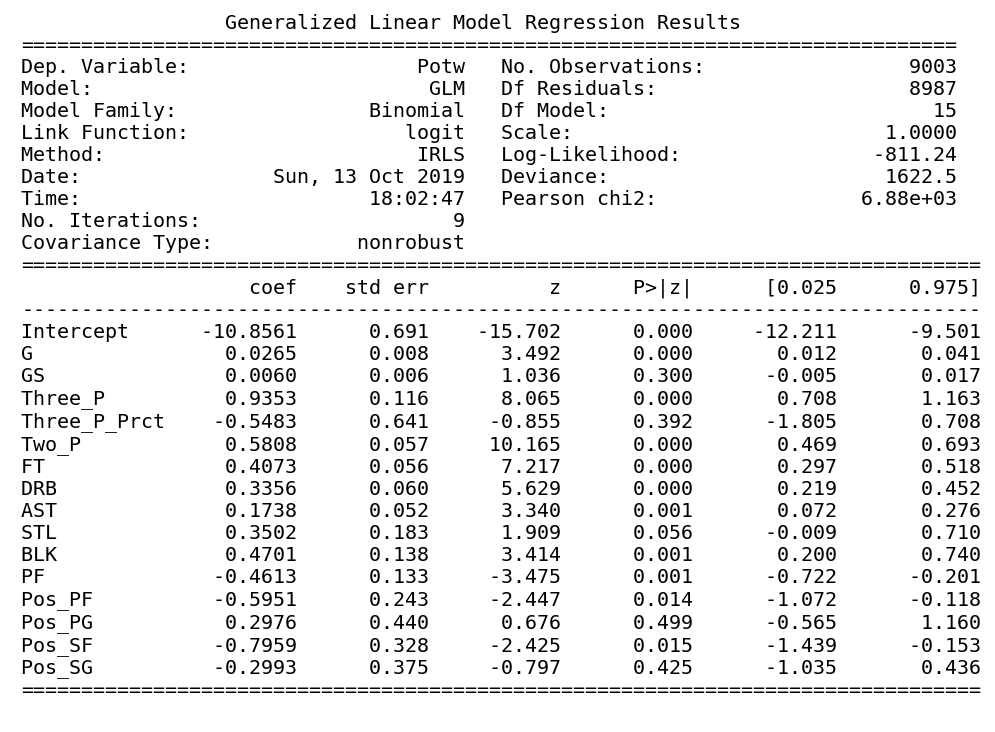

In [12]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm2.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model2.png', dpi = 300, bbox_inches = 'tight')

In [13]:
# Deviance test
delta_G = lm2.deviance - lm1.deviance
df_for_chi = len(lm1.params) - len(lm2.params)
chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
print("delta_G: " , delta_G )
print("chi2_stat: " , chi2_stat)
if delta_G < chi2_stat:
    print("delta_G < chi2_stat, and choose reduced model")

delta_G:  13.76605606447265
chi2_stat:  15.50731305586545
delta_G < chi2_stat, and choose reduced model


## Continue to remove variables by looking at deviance test

In [14]:
# find removable variables 
maybe_dl_pd = []
# for all the variables in the reduced model lm2
# deleting on predictor one time and do deviance test to see whether we should keep that predictor
for prds in df_c.columns:
    df = df_c.drop(columns=[prds])
    formula = f'Potw ~ {" + ".join(list(df))}'
    lm = smf.glm(formula, data = data2,family = sm.families.Binomial()).fit()
    delta_G = lm.deviance - lm1.deviance  
    df_for_chi = len(lm1.params) - len(lm.params)
    chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
    # if we cannot reject H0 and choose reduced model, save that removable variables
    if delta_G < chi2_stat:
        print(prds)
        print("delta_G: " , delta_G )
        print("chi2_stat: " , chi2_stat)
        print('delta_G < chi2_stat')
        print("========")
        maybe_dl_pd.append(prds)
# the list of removable variables 
maybe_dl_pd

GS
delta_G:  14.902076048945219
chi2_stat:  16.918977604620448
delta_G < chi2_stat
Three_P_Prct
delta_G:  14.509060475816568
chi2_stat:  16.918977604620448
delta_G < chi2_stat
Pos_PG
delta_G:  14.224653171684622
chi2_stat:  16.918977604620448
delta_G < chi2_stat
Pos_SG
delta_G:  14.399278331775577
chi2_stat:  16.918977604620448
delta_G < chi2_stat


['GS', 'Three_P_Prct', 'Pos_PG', 'Pos_SG']

In [15]:
# drop GS and Three_P_Prct as wald test also shows that they are not significant on alpha = 0.05
df_d = df_c.drop(columns = ['Three_P_Prct','GS'])
formula_3 = f'Potw ~ {" + ".join(list(df_d.columns))}'
lm3 = smf.glm(formula_3, data = data2,family=sm.families.Binomial()).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8989
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -812.20
Date:                Sun, 13 Oct 2019   Deviance:                       1624.4
Time:                        18:02:48   Pearson chi2:                 6.84e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.2300      0.640    -17.551      0.000     -12.484      -9.976
G              0.0321      0.005      6.327      0.000       0.022       0.042
Three_P        0.9161      0.102      9.001      0.000       0.717       1.116
Two_P          0.5946      0.055     10.773      0.000       0.486       0.703
FT             0.4073      0.057      7.205      0.000       0.297       0.518
DRB            0.3506      0.059      5.968      0.000       0.235       0.466
AST            0.1781      0.051      3.464      0.001       0.077       0.279
STL            0.3595      0.184      1.958      0.050      -0.000       0.719
BLK            0.4913      0.137      3.581      0.000       0.222       0.760
PF            -0.4453      0.132     -3.363      0.001      -0.705      -0.186
Pos_PF        -0.6254      0.243     -2.574      0.010      -1.102      -0.149
Pos_PG         0.3103      0.438      0.708      0.479      -0.549       1.170
Pos_SF        -0.8116      0.328     -2.477      0.013      -1.454      -0.169
Pos_SG        -0.3024      0.375     -0.806      0.420      -1.037       0.432
==============================================================================
"""

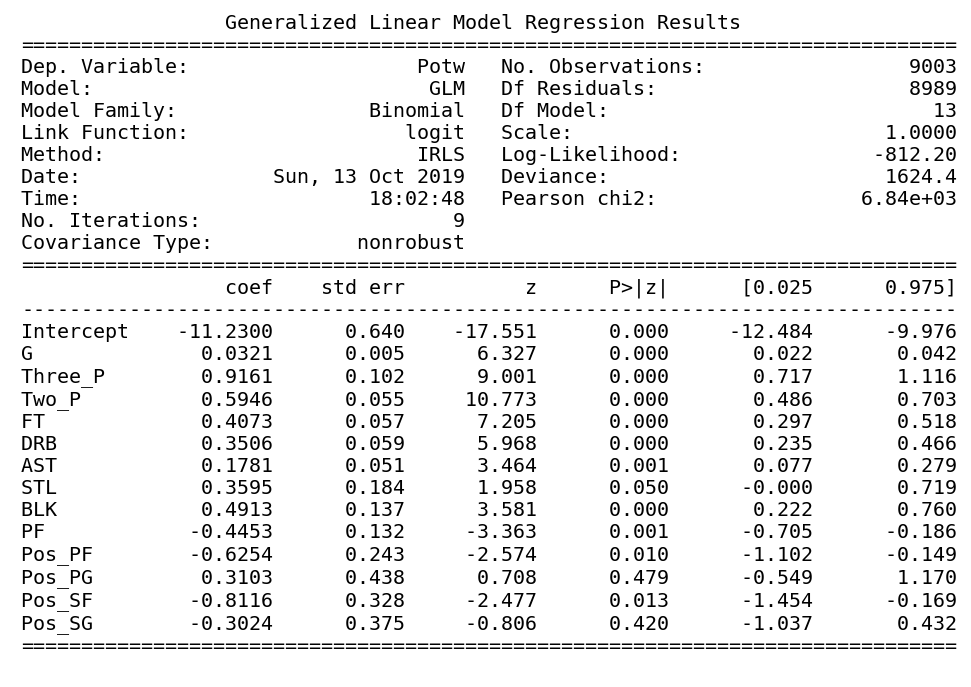

In [16]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm3.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model3.png', dpi = 300, bbox_inches = 'tight')

In [17]:
# vif factors for the remaining predictors
vif3 = pd.DataFrame()
vif3["Features"] = df_d.columns  
vif3["VIF Factor"] = [variance_inflation_factor(df_d.values, i) for i in range(df_d.shape[1])]
vif3 = vif3.sort_values('VIF Factor', ascending = False)
print(th.md_table(vif3, formats = {-1: 'c'}))

| Features   |   VIF Factor |
|:-----------|:------------:|
| Two_P      |     15.268   |
| DRB        |     12.0013  |
| PF         |     11.9826  |
| STL        |      9.41759 |
| FT         |      8.6996  |
| G          |      8.27271 |
| AST        |      8.09547 |
| BLK        |      3.77999 |
| Pos_PG     |      2.90391 |
| Three_P    |      2.76944 |
| Pos_SG     |      2.12558 |
| Pos_SF     |      1.80177 |
| Pos_PF     |      1.73616 |


In [18]:
# df_4 = df_d.columns[:-4]
# formula_4 = f'Potw ~ {" + ".join(list(df_4))}'
# lm4 = smf.glm(formula_4, data = data2,family=sm.families.Binomial()).fit()
# lm4.summary()

In [19]:
# delta_G = lm4.deviance - lm3.deviance
# df_for_chi = len(lm3.params) - len(lm4.params)
# # on significant level = 0.5, chi-square statistics
# chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
# print(delta_G)
# print(chi2_stat)
# if delta_G < chi2_stat:
#     print('delta_G < chi2_stat')
#     print('Therefore, we could not reject null hypothesis on significant level of 0.05 and choose reduced model')

**So far, here is the most reduced model**

# Model Diagnosis

## Pearson residuals -- Test Heteroscedasticity

In [20]:
ei = lm3.resid_pearson
prd = lm3.fittedvalues

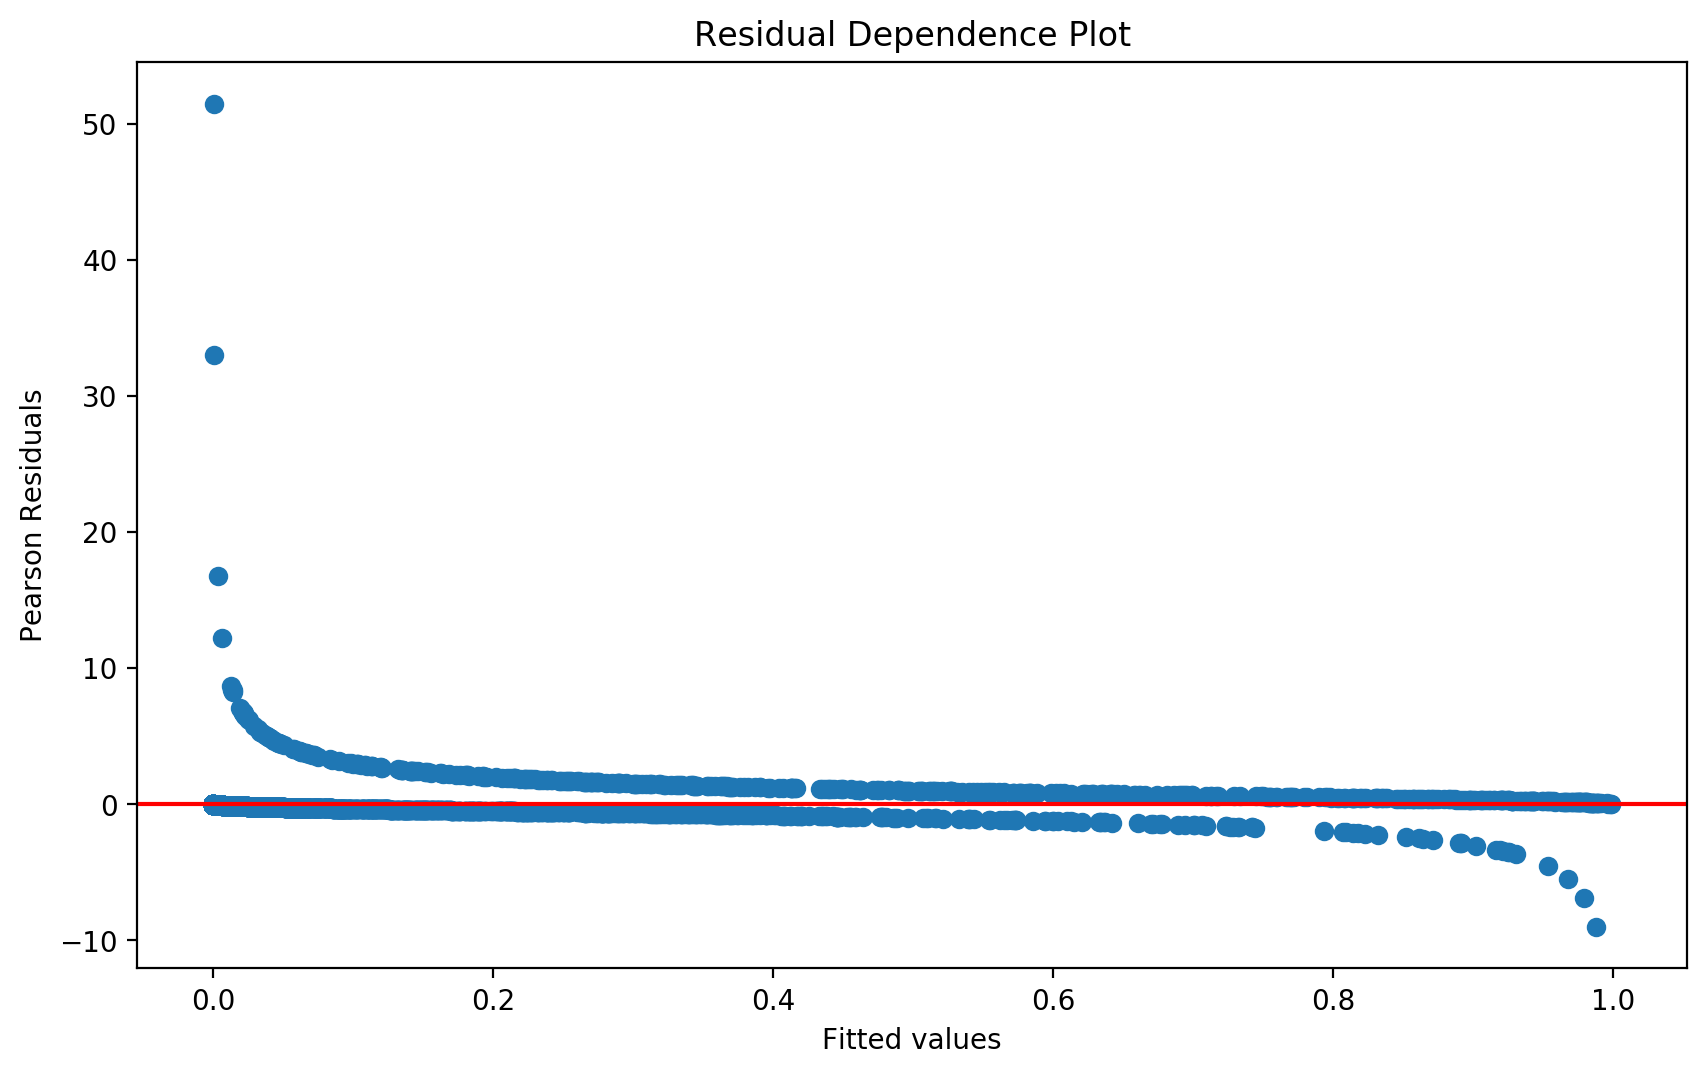

In [21]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(prd, ei)
plt.ylabel("Pearson Residuals")
plt.xlabel("Fitted values")
plt.title("Residual Dependence Plot")
plt.axhline(y=0, color = 'r')
plt.savefig('../plot/regression_1_residual.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### High Leverage Observations & Influential Points

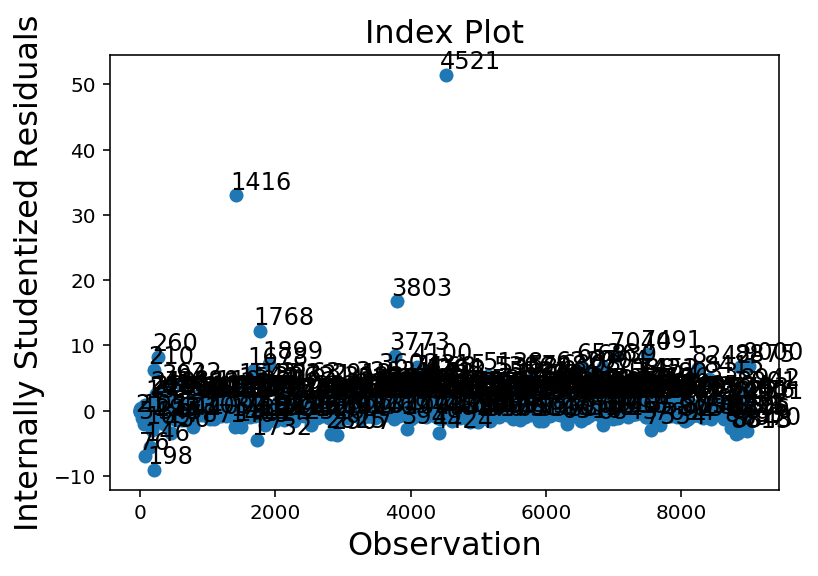

In [22]:
# Plot Abnormal Residual
infl = lm3.get_influence(observed=False)
summ_df = infl.summary_frame()
fig = infl.plot_index(y_var='resid', threshold=1)
plt.savefig('../plot/regression_1_abnormal_residuals.png', dpi = 300, bbox_inches = 'tight')

In [23]:
# high leverage points
top_hii = summ_df.sort_values('hat_diag', ascending=False)[:10].index
top_diffits = summ_df.sort_values('dffits_internal', ascending=False)[:10].index
top_cooksd = summ_df.sort_values('cooks_d', ascending=False)[:10].index
lm3_n = lm3.nobs
lm3_p = len(lm3.params)
hiis = summ_df[['hat_diag']]
hiis_threshold = 3*lm3_p/lm3_n
hiis_index = hiis.loc[hiis.hat_diag > hiis_threshold].index

In [24]:
# Influential Points -- diffits
lm3_n = lm3.nobs
lm3_p = len(lm3.params)
diffits = summ_df[['dffits_internal']]
diffits_threshold = 2*(((lm3_p+1)/(lm3_n-lm3_p-1))**0.5)
diffits_index = diffits.loc[diffits.dffits_internal > diffits_threshold].index
# Influential Points -- cook's distance
cooks_d = summ_df[['cooks_d']]
cooks_d_threshold = 4/(lm3_n - lm3_p)
cooks_d_index = cooks_d.loc[cooks_d.cooks_d > cooks_d_threshold].index

In [25]:
# Outliers -- absolute values of residuals are higher than 3
res_index = summ_df.loc[abs(summ_df.standard_resid)>3].index
# top_res.sort_values('standard_resid', ascending=True)

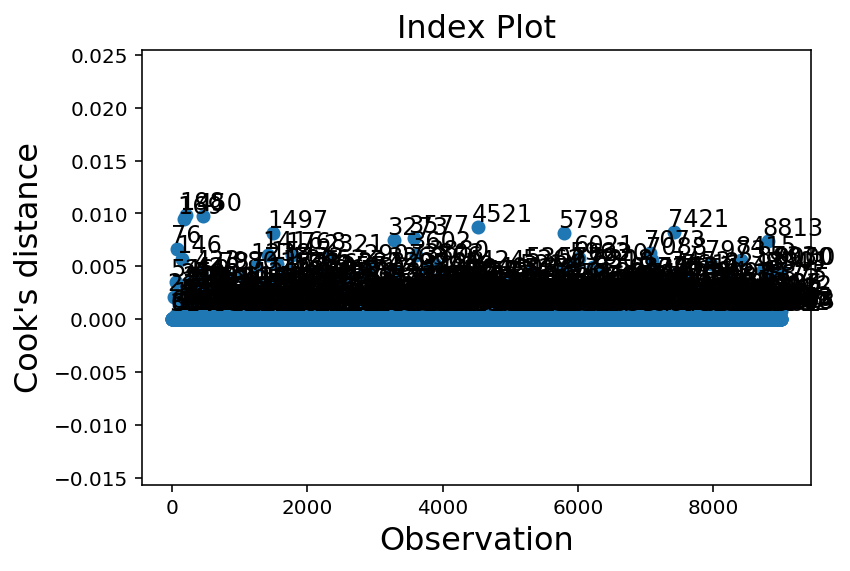

In [26]:
fig = infl.plot_index(y_var='cooks', threshold=2 * infl.cooks_distance[0].mean())
plt.savefig('../plot/regression_1_cooks.png', dpi = 300, bbox_inches = 'tight')

In [27]:
infl_points = (diffits_index & cooks_d_index)
infl_points

Int64Index([  64,  157,  193,  210,  215,  216,  219,  229,  240,  260,
            ...
            8731, 8763, 8783, 8875, 8876, 8901, 8942, 8943, 9000, 9001],
           dtype='int64', length=305)

In [28]:
dele_ob = (infl_points | res_index)
dele_ob

Int64Index([  64,   76,  146,  157,  193,  198,  210,  215,  216,  219,
            ...
            8813, 8843, 8875, 8876, 8901, 8942, 8943, 8970, 9000, 9001],
           dtype='int64', length=316)

In [29]:
pd.set_option('display.max_columns', 500)
data.iloc[dele_ob,:]

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG_Prct,Three_P,Three_PA,Three_P_Prct,Two_P,Two_PA,Two_P_Prct,eFG_Prct,FT,FTA,FT_Prct,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
64,1991,Clyde Drexler,SG,28.0,POR,82,82,34.8,7.9,16.3,0.482,0.7,2.3,0.319,7.1,14.0,0.509,0.505,5.1,6.4,0.794,2.6,4.1,6.7,6.0,1.8,0.7,2.8,2.8,21.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1180000
76,1991,Patrick Ewing,C,28.0,NYK,81,81,38.3,10.4,20.3,0.514,0.0,0.1,0.000,10.4,20.2,0.516,0.514,5.7,7.7,0.745,2.4,8.8,11.2,3.0,1.0,3.2,3.6,3.5,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4250000
146,1991,Karl Malone,PF,27.0,UTA,82,82,40.3,10.3,19.6,0.527,0.0,0.2,0.286,10.3,19.4,0.529,0.528,8.3,10.8,0.770,2.9,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2260000
157,1991,Reggie Miller,SG,25.0,IND,82,82,36.2,7.3,14.2,0.512,1.4,3.9,0.348,5.9,10.3,0.575,0.560,6.7,7.3,0.918,1.0,2.4,3.4,4.0,1.3,0.2,2.0,2.0,22.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,654000
193,1991,Mitch Richmond,SG,25.0,GSW,77,77,39.3,9.1,18.5,0.494,0.5,1.5,0.348,8.6,17.0,0.506,0.508,5.1,6.0,0.847,1.9,4.0,5.9,3.1,1.6,0.4,3.0,2.7,23.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8942,2019,Pascal Siakam,PF,24.0,TOR,80,79,31.9,6.5,11.8,0.549,1.0,2.7,0.369,5.5,9.1,0.602,0.591,3.0,3.8,0.785,1.6,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1544951
8943,2019,Ben Simmons,PG,22.0,PHI,79,79,34.2,6.8,12.2,0.563,0.0,0.1,0.000,6.8,12.1,0.566,0.563,3.3,5.4,0.600,2.2,6.6,8.8,7.7,1.4,0.8,3.5,2.6,16.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6434520
8970,2019,Karl-Anthony Towns,C,23.0,MIN,77,77,33.1,8.8,17.1,0.518,1.8,4.6,0.400,7.0,12.5,0.562,0.572,4.9,5.8,0.836,3.4,9.0,12.4,3.4,0.9,1.6,3.1,3.8,24.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7839435
9000,2019,Thaddeus Young,PF,30.0,IND,81,81,30.7,5.5,10.4,0.527,0.6,1.8,0.349,4.8,8.6,0.564,0.557,1.1,1.7,0.644,2.4,4.1,6.5,2.5,1.5,0.4,1.5,2.4,12.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13764045


## Rebuild Model: Final Model

In [30]:
data3 = data2.drop(dele_ob).reset_index(drop = True)
formula_4 = f'Potw ~ {" + ".join(list(df_d.columns))}'
lm4 = smf.glm(formula_3, data = data3,family=sm.families.Binomial()).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 8687
Model:                            GLM   Df Residuals:                     8673
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.923
Date:                Sun, 13 Oct 2019   Deviance:                       175.85
Time:                        18:02:59   Pearson chi2:                     204.
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.9893      5.114     -8.602      0.000     -54.013     -33.966
G              0.1668      0.029      5.704      0.000       0.110       0.224
Three_P        2.4891      0.353      7.052      0.000       1.797       3.181
Two_P          1.9363      0.269      7.186      0.000       1.408       2.464
FT             1.3466      0.200      6.738      0.000       0.955       1.738
DRB            1.0637      0.224      4.751      0.000       0.625       1.503
AST            0.4244      0.159      2.675      0.007       0.113       0.735
STL            1.9159      0.590      3.247      0.001       0.759       3.073
BLK            1.3372      0.455      2.940      0.003       0.446       2.229
PF            -1.4383      0.484     -2.970      0.003      -2.387      -0.489
Pos_PF        -1.6189      0.733     -2.209      0.027      -3.056      -0.182
Pos_PG         2.3514      1.533      1.534      0.125      -0.654       5.357
Pos_SF        -2.4764      1.128     -2.195      0.028      -4.687      -0.265
Pos_SG        -0.8487      1.288     -0.659      0.510      -3.372       1.675
==============================================================================
"""

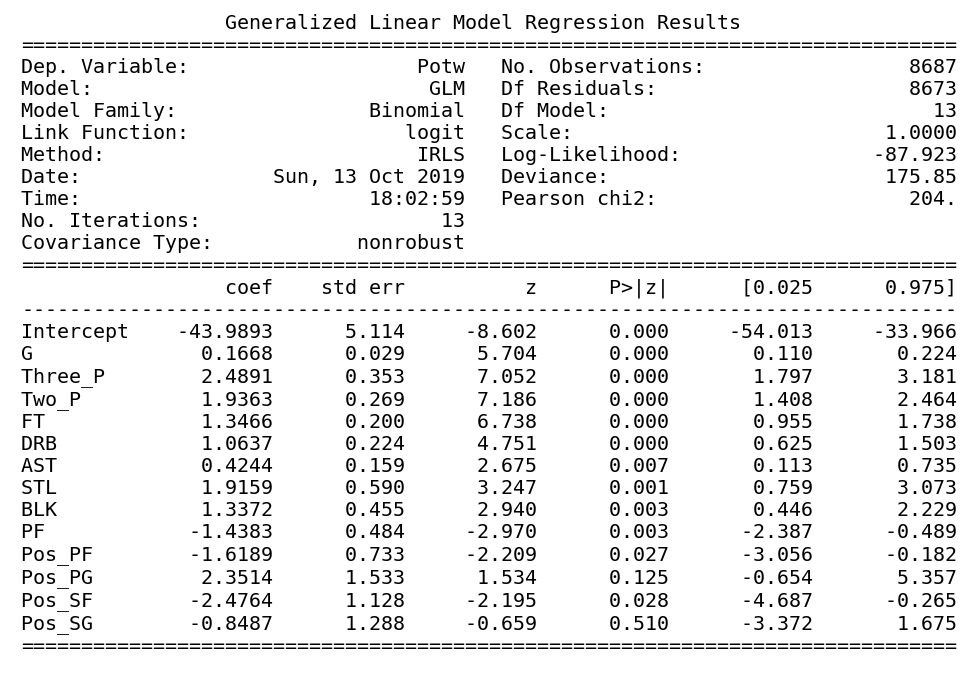

In [31]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm4.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model4.png', dpi = 300, bbox_inches = 'tight')

In [32]:
df_5 = df_d.columns[:-4]
formula_5 = f'Potw ~ {" + ".join(list(df_5))}'
lm5 = smf.glm(formula_5, data = data3,family=sm.families.Binomial()).fit()
delta_G = lm5.deviance - lm4.deviance
df_for_chi = len(lm4.params) - len(lm5.params)
# on significant level = 0.5, chi-square statistics
chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
print(delta_G)
print(chi2_stat)
if delta_G < chi2_stat:
    print('delta_G < chi2_stat')
    print('Therefore, we could not reject null hypothesis on significant level of 0.05 and choose reduced model')

32.42343035150705
9.487729036781154


## final model analysis

In [33]:
## Compare aic and bic of all models
model_lst = [lm1,lm2,lm3,lm4,lm5]
aic_bic = pd.DataFrame()
aic_bic['Model'] = ['lm' + str(i) for i in range(1,6)]
aic_bic['aic'] = [i.aic for i in model_lst]
aic_bic['bic'] = [i.bic for i in model_lst]
print(th.md_table(aic_bic, formats = {-1: 'c'}))

| Model   |      aic |      bic |
|:--------|---------:|:--------:|
| lm1     | 1656.71  | -80147.9 |
| lm2     | 1654.48  | -80207   |
| lm3     | 1652.39  | -80223.3 |
| lm4     |  203.846 | -78484.6 |
| lm5     |  228.269 | -78488.5 |


In [34]:
## vif - detect Multicollinearity
prd_data = data3[lm4.params.index.drop('Intercept')]
vif = pd.DataFrame()
vif['Features'] = prd_data.columns
vif['VIF Factor'] = [variance_inflation_factor(prd_data.values, i) for i in range(prd_data.shape[1])]
print(th.md_table(vif, formats = {-1: 'c'}))

| Features   |   VIF Factor |
|:-----------|:------------:|
| G          |      8.00512 |
| Three_P    |      2.72847 |
| Two_P      |     15.0038  |
| FT         |      8.42619 |
| DRB        |     11.8396  |
| AST        |      7.91127 |
| STL        |      9.25145 |
| BLK        |      3.76007 |
| PF         |     11.9489  |
| Pos_PF     |      1.73034 |
| Pos_PG     |      2.86622 |
| Pos_SF     |      1.79061 |
| Pos_SG     |      2.10744 |


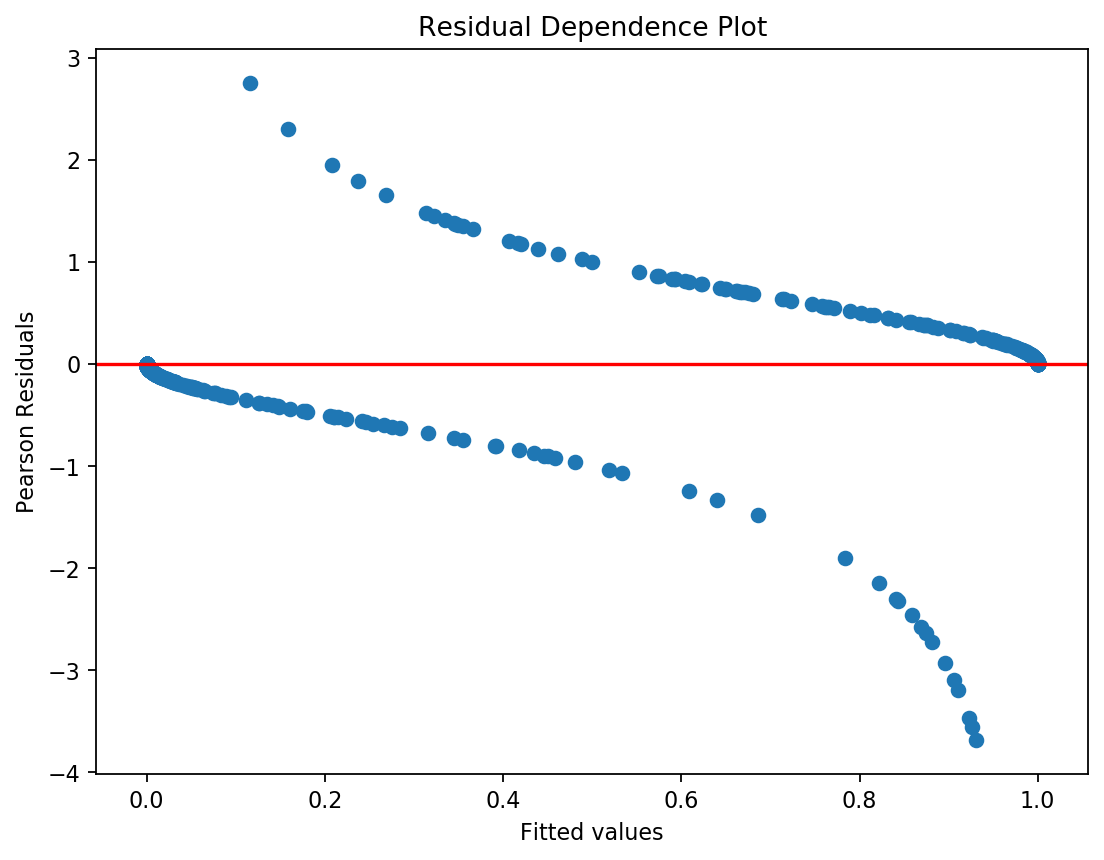

In [35]:
## residuals plot - detect Heteroscedasticity
ei = lm4.resid_pearson
prd = lm4.fittedvalues
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(prd, ei)
plt.ylabel("Pearson Residuals")
plt.xlabel("Fitted values")
plt.title("Residual Dependence Plot")
plt.axhline(y=0, color = 'r')
plt.savefig('../plot/regression_1_final_residual.png', dpi = 300, bbox_inches = 'tight')
plt.show()

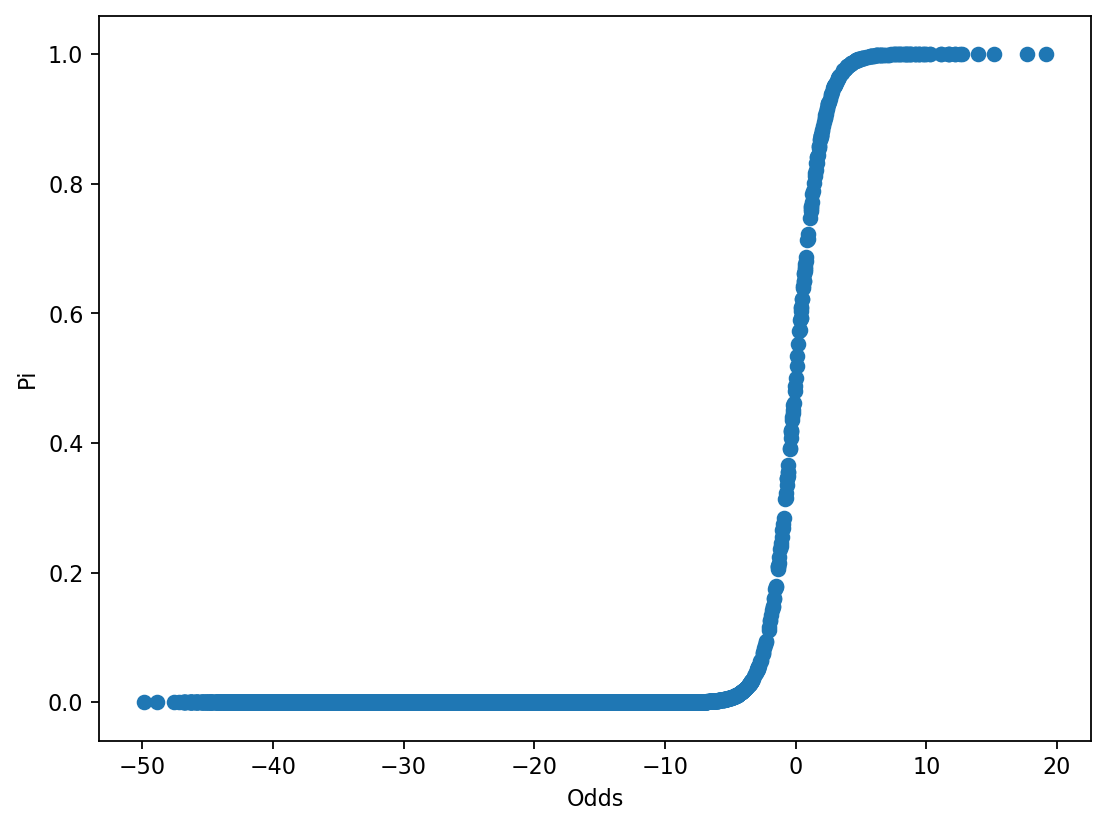

In [36]:
# plot how pi changes with the model
pi = prd
odds = pi / (1-pi)
yi = np.log(odds)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(yi,pi)
plt.ylabel("Pi")
plt.xlabel("Odds")
plt.savefig('../plot/regression_1_pi.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [49]:
# table for exp(beta_i)
import math
beta_i = ['βi']
beta_i.extend(list(lm4.params.values))
e_beta_i = ['e^(βi)']
e_beta_i.extend([math.exp(par) for par in lm4.params])
beta_col = ['Type']
beta_col.extend(list(lm4.params.index))
beta = pd.DataFrame([beta_i, e_beta_i], columns = beta_col)
print(th.md_table(beta, formats = {-1: 'c'}))

| Type   |     Intercept |       G |   Three_P |   Two_P |      FT |     DRB |      AST |     STL |     BLK |       PF |    Pos_PF |   Pos_PG |     Pos_SF |    Pos_SG |
|:-------|--------------:|--------:|----------:|--------:|--------:|--------:|---------:|--------:|--------:|---------:|----------:|---------:|-----------:|:---------:|
| βi     | -43.9893      | 0.16684 |   2.48911 | 1.93632 | 1.34657 | 1.06373 | 0.424438 | 1.91591 | 1.33724 | -1.4383  | -1.6189   |  2.35139 | -2.47636   | -0.848657 |
| e^(βi) |   7.86469e-20 | 1.18157 |  12.0505  | 6.93322 | 3.84421 | 2.89715 | 1.52873  | 6.79309 | 3.80851 |  0.23733 |  0.198117 | 10.5002  |  0.0840489 |  0.427989 |


In [38]:
lm4.params.index.drop('Intercept')

Index(['G', 'Three_P', 'Two_P', 'FT', 'DRB', 'AST', 'STL', 'BLK', 'PF',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [39]:
predictions_median = data2.loc[data.Year == 2019].groupby('Year').median()[lm4.params.index.drop('Intercept')].values
predictions2 = data2.loc[data.Year == 2019].groupby('Year').max()[lm4.params.index.drop('Intercept')].values
print(predictions_median)
predictions2[0][9] = 0
predictions2[0][11] = 0
predictions2[0][12] = 0
predictions2[0][3] = 0
predictions_max = predictions2
print(predictions_max)

[[56.   0.9  2.1  1.   2.5  1.5  0.6  0.3  1.9  0.   0.   0.   0. ]]
[[82.   5.1  9.3  0.  11.1 10.7  2.4  2.7  3.8  0.   1.   0.   0. ]]


In [40]:
predictions_median = np.insert(predictions_median,0,1,axis = 1)
predictions_max = np.insert(predictions_max,0,1,axis = 1)

In [41]:
print(predictions_median)
print(predictions_max)

[[ 1.  56.   0.9  2.1  1.   2.5  1.5  0.6  0.3  1.9  0.   0.   0.   0. ]]
[[ 1.  82.   5.1  9.3  0.  11.1 10.7  2.4  2.7  3.8  0.   1.   0.   0. ]]


In [42]:
paras = lm4.params.values
print(paras)
result1 = paras.T * predictions_median
result2 = paras.T * predictions_max
prd_median = np.sum(result1)
prd_max = np.sum(result2)
print(round(math.exp(prd_median) / (1 + math.exp(prd_median)), 2))
print(round(math.exp(prd_max) / (1 + math.exp(prd_max)), 2))

[-43.9893182    0.16684023   2.48910564   1.93632489   1.346568
   1.06372582   0.42443824   1.91590623   1.33723751  -1.43830402
  -1.61889776   2.35139108  -2.47635651  -0.84865715]
0.0
1.0


In [52]:
pred_median = list(predictions_median[0])
pred_median.append(round(math.exp(prd_median) / (1 + math.exp(prd_median)), 2))
pred_max = list(predictions_max[0])
pred_max.append(round(math.exp(prd_max) / (1 + math.exp(prd_max)), 2))
pred_col = ['Predicted πi']
pred_col.extend(list(lm4.params.index))

prediction_table = pd.DataFrame([pred_median, pred_max], columns = pred_col)
print(th.md_table(prediction_table, formats = {-1: 'c'}))

|   Predicted πi |   Intercept |   G |   Three_P |   Two_P |   FT |   DRB |   AST |   STL |   BLK |   PF |   Pos_PF |   Pos_PG |   Pos_SF |   Pos_SG |
|---------------:|------------:|----:|----------:|--------:|-----:|------:|------:|------:|------:|-----:|---------:|---------:|---------:|:--------:|
|              1 |          56 | 0.9 |       2.1 |       1 |  2.5 |   1.5 |   0.6 |   0.3 |   1.9 |    0 |        0 |        0 |        0 |        0 |
|              1 |          82 | 5.1 |       9.3 |       0 | 11.1 |  10.7 |   2.4 |   2.7 |   3.8 |    0 |        1 |        0 |        0 |        1 |
